In [ ]:
! pip install flatland-rl
# ! pip flatland-demo # show demonstration
# ! python <<EOF # random agent

In [1]:
import numpy as np
from flatland.envs.rail_env import RailEnv

In [2]:
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.observations import GlobalObsForRailEnv

In [3]:
rail_generator = sparse_rail_generator(max_num_cities=10)

env = RailEnv(
    width=30, 
    height=30, 
    number_of_agents=10,
    rail_generator=rail_generator,
    line_generator=sparse_line_generator(),
    obs_builder_object=GlobalObsForRailEnv(),
    )
obs = env.reset()
while True:
    obs, rew, done, info = env.step({
            0: np.random.randint(0, 5),
            1: np.random.randint(0, 5)
        })
    if done:
        break

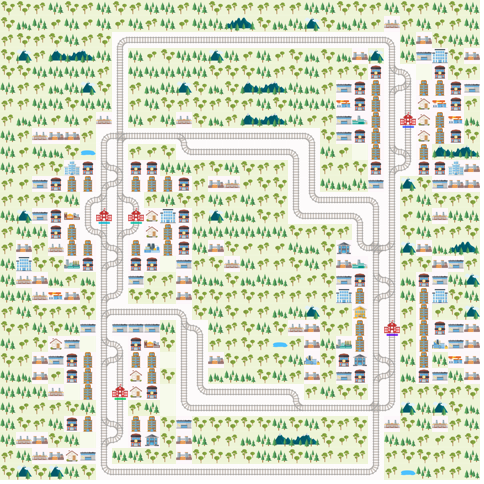

In [4]:
import PIL
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output


# Render the environment
def render_env(env,wait=True):
    
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    clear_output(wait=True)
    display(pil_image)

render_env(env)

In [5]:
class RandomController:
    def __init__(self, action_size):
        self.action_size = action_size

    def act(self, observations):
        actions = dict()
        for agent_handle, observation in enumerate(observations):
            action = np.random.randint(self.action_size)
            actions.update({agent_handle: action})
        return actions

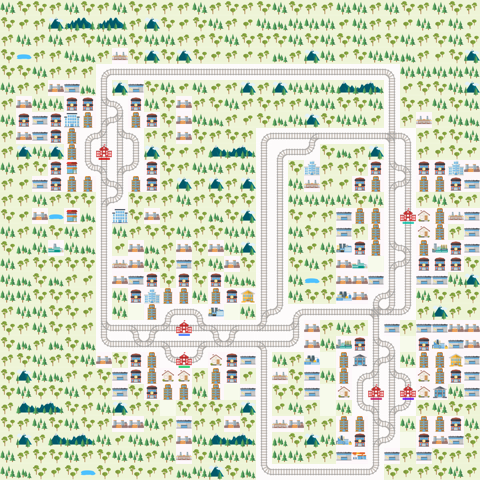

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  r  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  l  -  -  -  -  - 
 -  -  -  -  -  -  |  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  |  -  -  -  -  - 
 -  -  -  -  -  -  ?  l  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  |  -  -  -  -  - 
 -  -  -  -  -  -  M  ?  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  |  -  -  -  -  - 
 -  -  -  -  -  r  ?  ?  l  -  -  -  -  -  -  -  r  ?  ?  ?  ?  ?  ?  ?  1  l  -  -  -  - 
 -  -  -  -  -  |  |  |  |  -  -  -  -  -  -  -  |  r  ?  ?  -  -  -  -  |  |  -  -  -  - 
 -  -  -  -  -  ?  s  M  ?  -  -  -  -  -  -  -  |  |  -  -  -  -  -  -  ?  s  -  -  -  - 

In [13]:
from flatland.envs.rail_env import RailEnvActions
import seaborn as sns 
sns.set_theme()


random_env = env

controller = RandomController(random_env.action_space[0])
observations, info = random_env.reset()
render_env(random_env)
actions = controller.act(observations)

# Perform a single action per agent
# 0B = Do nothing
# 1L = Left
# 2F = Forward
# 3R = Right 
# 4S = Stop

trans2 = {"0000000000000000" : "empty cell - Case 0",
        "1000000000100000" : "Case 1 - straight",
        "1001001000100000" : "Case 2 - simple switch",
        "1000010000100001" : "Case 3 - diamond drossing",
        "1001011000100001" : "Case 4 - single slip",
        "1100110000110011" : "Case 5 - double slip",
        "0101001000000010" : "Case 6 - symmetrical",
        "0010000000000000" : "Case 7 - dead end",
        "0100000000000010" : "Case 1b (8)  - simple turn right",
        "0001001000000000" : "Case 1c (9)  - simple turn left",
        "1100000000100010" : "Case 2b (10) - simple switch mirrored"}

trans = {"0000000000000000" : " - ",
        "1000000000100000" : " | ",
        "1001001000100000" : " s ",
        "1000010000100001" : " d ",
        "1001011000100001" : " 1 ",
        "1100110000110011" : " 2",
        "0101001000000010" : " = ",
        "0010000000000000" : " x ",
        "0100000000000010" : " r ",
        "0001001000000000" : " l ",
        "1100000000100010" : " M "}

# Channel 0: one-hot representation of the self agent position and direction
# Channel 1: other agents’ positions and direction
# Channel 2: self and other agents’ malfunctions
# Channel 3: self and other agents’ fractional speeds
# Channel 4: number of other agents ready to depart from that position

for (handle, action) in actions.items():
    #print('Agent {} will perform action {} ({})'.format(handle, action, RailEnvActions.to_char(action)))
    next_obs, all_rewards, dones, info = random_env.step({handle: action})
    out = ""
    for i in range(30):
        for j in range(30):
            obs = "".join(str(int(e)) for e in next_obs.get(handle)[0][i][j])
            if obs in trans:
                type = trans[obs]
            else:
                type = " ? "
            out += type
        out += "\n"
print(out)
                


# print('Rewards for each agent: {}'.format(all_rewards))
# print('Done for each agent: {}'.format(dones))
# print('Misc info: {}'.format(info))

In [12]:
def run_episode(env):
    controller = RandomController(env.action_space[0])
    observations, info = env.reset()

    score = 0
    actions = dict()

    for step in range(50):

        actions = controller.act(observations)
        next_observations, all_rewards, dones, info = env.step(actions)
        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]

        render_env(env)
        print('Timestep {}, total score = {}'.format(step, score))

        if dones['__all__']:
            print('All done!')
            return

    print("Episode didn't finish after 50 timesteps.")

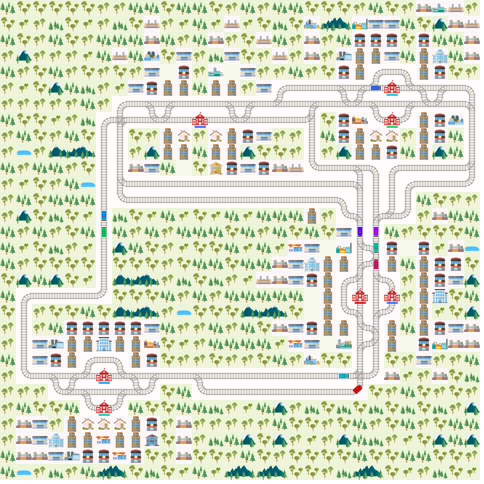

Timestep 49, total score = 0
Episode didn't finish after 50 timesteps.


In [ ]:
run_episode(random_env)

In [ ]:
import numpy as np
from flatland.envs.observations import TreeObsForRailEnv
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.predictions import ShortestPathPredictorForRailEnv
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output
import PIL
%matplotlib inline

In [ ]:
def render_env(env,wait=True):
    
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    clear_output(wait=True)
    display(pil_image)

def min_gt(seq, val):
    """
    Return smallest item in seq for which item > val applies.
    None is returned if seq was empty or all items in seq were >= val.
    """
    min = np.inf
    idx = len(seq) - 1
    while idx >= 0:
        if seq[idx] >= val and seq[idx] < min:
            min = seq[idx]
        idx -= 1
    return min

In [ ]:
class OrderedAgent:

    def __init__(self):
        self.action_size = 5

    def act(self, state, eps=0):
        """
        :param state: input is the observation of the agent
        :return: returns an action
        """
        distance = []
        for direction in TreeObsForRailEnv.tree_explored_actions_char:
            try:
                distance.append(state.childs[direction].dist_min_to_target)
            except:
                distance.append(np.inf)
        distance = np.array(distance)
        min_dist = min_gt(distance, 0)
        min_direction = np.where(distance == min_dist)
        if len(min_direction[0]) > 1:
            return min_direction[0][-1] + 1
        return min_direction[0][0] + 1

In [ ]:
np.random.seed(2)
x_dim = 30  # np.random.randint(8, 20)
y_dim = 30  # np.random.randint(8, 20)
n_agents = 30  # np.random.randint(3, 8)
n_goals = n_agents + np.random.randint(0, 3)
min_dist = int(0.75 * min(x_dim, y_dim))

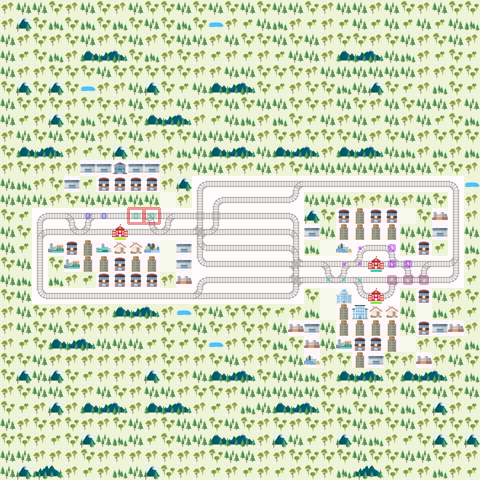

In [ ]:
env = RailEnv(width=x_dim,
              height=y_dim,
              rail_generator=sparse_rail_generator(),
              line_generator=sparse_line_generator(),
              obs_builder_object=TreeObsForRailEnv(max_depth=1,
              predictor=ShortestPathPredictorForRailEnv()),
              number_of_agents=n_agents)
env.reset()
render_env(env)

In [ ]:
def run_episode(env, agent, render = True):

    env_renderer = RenderTool(env)
    max_steps = 100 * (env.height + env.width)-1
    action_dict = dict()
    # Reset environment
    obs, info = env.reset(regenerate_rail = False,regenerate_schedule = False)
    done = env.dones
    env_renderer.reset()
    frame_step = 0
    score = 0
    # Run episode
    for step in range(max_steps):

        # Action
        acting_agent = 30
        for a in range(env.get_num_agents()):
            if done[a]:
                acting_agent += 1
            if a == acting_agent:
                action = agent.act(obs[a])
            else:
                action = 4
            action_dict.update({a: action})
        # Environment step

        obs, all_rewards, done, _ = env.step(action_dict)
        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]
        print('Timestep {}, total score = {}'.format(step, score))


        if done['__all__']:
            print('All done')
            break

        # Render
        if render:
            render_env(env)
        else:
            clear_output()

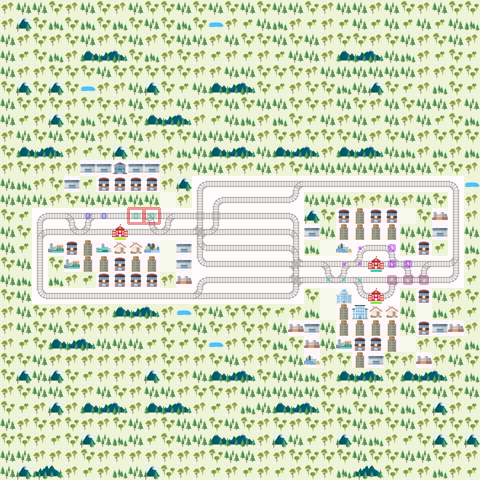

Timestep 58, total score = -822
All done


In [ ]:
run_episode(env,OrderedAgent())